# Analyze Graphs Generated by PrefGAN

We begin by defining data structures used to represent graphs, and the functions to create them

In [3]:
from matplotlib.pyplot import plot

class Node:
    def __init__(self, label, edgelist):
        self.label = label
        self.edgelist = edgelist
        
class Graph:
    def __init__(self, nodelist, edgestore):
        self.nodelist = nodelist
        self.edgestore = edgestore
        self.num_edges = len(edgestore)

def addedge(nodelist,a,b):
    for node in nodelist:
        if node.label == a:
            node.edgelist.append(b)

def filetograph(filename):
    lines = []
    with open(filename) as file:
        lines = file.readlines()
    lines = [a.strip() for a in lines]
    labels = [a[0] for a in lines if '[' in a]
    edges = [a for a in lines if '-' in a]
    node_li = []
    edge_li = []
    for l in labels:
        node_li.append(Node(l,[]))
    for e in edges:
        a,b = e[0], e[-1]
        addedge(node_li,a,b)
        edge_li.append((a,b))
    return Graph(node_li,edgestore = edge_li)

Read in every file from the specified log folder and create graphs

In [4]:
import os
folder_name = os.listdir('../graph_logs')[0]
files = os.listdir('../graph_logs/'+folder_name)
files = ['../graph_logs/' + folder_name + '/' +  x for x in files if '.png' not in x]
graph_list = []
for f in files:
    graph_list.append(filetograph(f))


## Edge Counts over Time

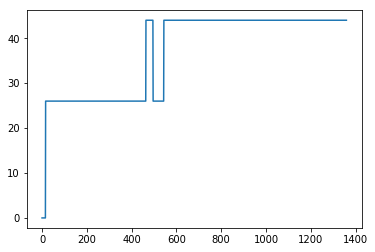

In [5]:
edge_counts = [x.num_edges for x in graph_list]
x = list(range(0,len(edge_counts)))
plot(x,edge_counts)

## Changes from Previous Graph

In [27]:
def dif(a_li,b_li):
    i = 0
    for a in a_li:
        if a not in b_li:
            i+=1
    for b in b_li:
        if b not in a_li:
            i+=1
    return i

difs = [dif(graph_list[i].edgestore,graph_list[i+1].edgestore) for i in range(0,len(graph_list)-1)]
nonzero = [(x,i) for i,x in enumerate(difs) if x != 0]
print('Iteration #\tΔ')
for x,i in nonzero:
    print('{}\t\t{}'.format(i,x+1))    

Iteration #	Δ
15		27
463		71
495		71
543		71


This shows that the flat sections of the graph experienced no change